<a href="https://colab.research.google.com/github/ms624atyale/Berenstain_FamilySocial/blob/main/6_Normality_MannWhitney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --upgrade nbformat nbconvert

    narrative  N_splits  MATTR
0           1       623  0.781
1           1       896  0.745
2           1      1267  0.760
3           1       787  0.774
4           1      1031  0.754
5           1      1156  0.798
6           1      1306  0.753
7           1      1507  0.788
8           2       804  0.788
9           2      1035  0.785
10          2      1153  0.777
11          2      1485  0.773
12          2      1415  0.756
13          2      1255  0.801
14          2      1300  0.787
15          2      1533  0.792


Full set of data points for Non-Gaussian data:
    MATTR
0   0.781
1   0.745
2   0.760
3   0.774
4   0.754
5   0.798
6   0.753
7   0.788
8   0.788
9   0.785
10  0.777
11  0.773
12  0.756
13  0.801
14  0.787
15  0.792


Shapiro-Wilk Test Statistic: 0.6674397320983676
p-value: 3.6906580955909825e-09
Sample does not look Gaussian (reject H0)


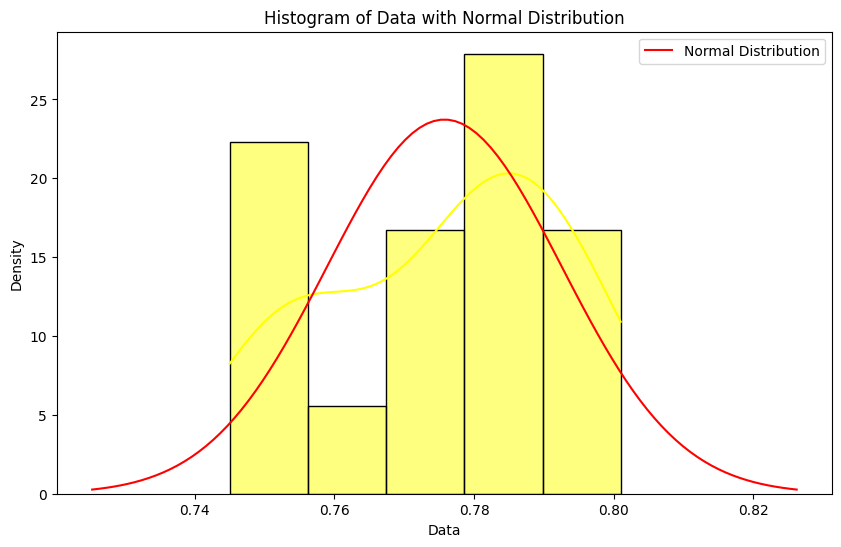

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import shapiro
from scipy.stats import kstest, norm # stats


# Load the data from the CSV file
data = pd.read_csv('/content/sample_data/narrative_NSplits_MATTR.csv')
df = data['MATTR']  # Extract the column containing the data


# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(data)
print(data)
print('\n')


# Convert the data to a pandas DataFrame
df2 = pd.DataFrame(data, columns=['MATTR'])
# Display the full set of data points
print("Full set of data points for Non-Gaussian data:")
print(df2)
print('\n')

# Save the DataFrame to a CSV file
df2.to_csv('data.csv', index=True)

# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(data)

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


# Plot histogram of the data
plt.figure(figsize=(10, 6))
sns.histplot(df, kde=True, color='yellow', stat='density')

# Plot normal distribution curve
mu, sigma = np.mean(df), np.std(df)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal Distribution')

plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data with Normal Distribution')
plt.legend()
plt.show()

    narrative  N_splits  MATTR
0           1       623  0.781
1           1       896  0.745
2           1      1267  0.760
3           1       787  0.774
4           1      1031  0.754
5           1      1156  0.798
6           1      1306  0.753
7           1      1507  0.788
8           2       804  0.788
9           2      1035  0.785
10          2      1153  0.777
11          2      1485  0.773
12          2      1415  0.756
13          2      1255  0.801
14          2      1300  0.787
15          2      1533  0.792


Full set of data points for Non-Gaussian data:
    N_splits
0        623
1        896
2       1267
3        787
4       1031
5       1156
6       1306
7       1507
8        804
9       1035
10      1153
11      1485
12      1415
13      1255
14      1300
15      1533


Shapiro-Wilk Test Statistic: 0.6674397320983676
p-value: 3.6906580955909825e-09
Sample does not look Gaussian (reject H0)


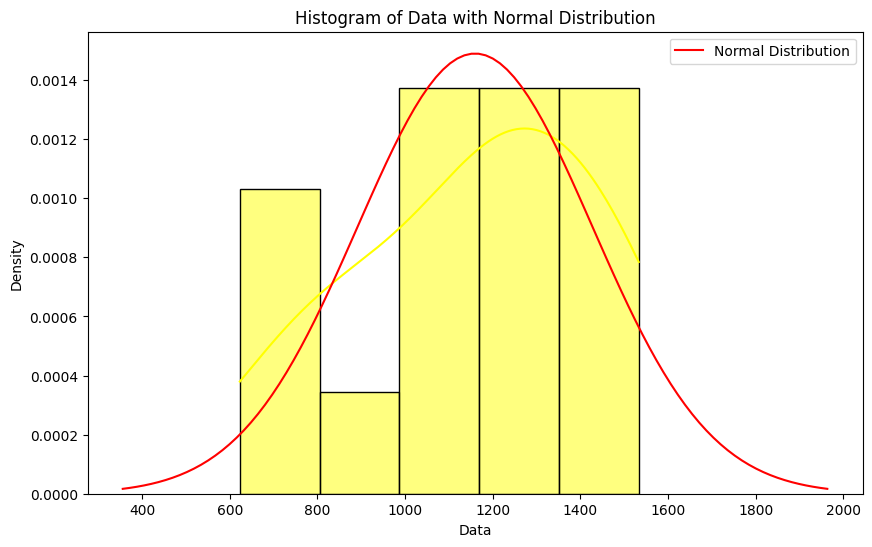

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import shapiro
from scipy.stats import kstest, norm # stats


# Load the data from the CSV file
data = pd.read_csv('/content/sample_data/narrative_NSplits_MATTR.csv')
df = data['N_splits']  # Extract the column containing the data


# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(data)
print(data)
print('\n')


# Convert the data to a pandas DataFrame
df2 = pd.DataFrame(data, columns=['N_splits'])
# Display the full set of data points
print("Full set of data points for Non-Gaussian data:")
print(df2)
print('\n')

# Save the DataFrame to a CSV file
df2.to_csv('data2.csv', index=True)

# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(data)

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


# Plot histogram of the data
plt.figure(figsize=(10, 6))
sns.histplot(df, kde=True, color='yellow', stat='density')

# Plot normal distribution curve
mu, sigma = np.mean(df), np.std(df)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal Distribution')

plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data with Normal Distribution')
plt.legend()
plt.show()


In [10]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('/content/sample_data/narrative_NSplits_MATTR.csv')

# 'group1' and 'group2' are the columns containing the two groups of data
# Extract the measurements for each group
group1 = data[data['narrative'] == 1]['MATTR']
group2 = data[data['narrative'] == 2]['MATTR']

# Using the mannwhitneyu function from the scipy.stats module,
#it takes two groups of data (group1 and group2) as input and
#performs a two-sided test (i.e., tests whether the distributions of the two groups are different).
U_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Calculate mean and standard deviation for U
n1 = len(group1) #len() calculates the number of observations in group1
n2 = len(group2)
# Calculate the mean of the U statistic under the null hypothesis of no difference between the two groups.
#It's calculated as the product of the sample sizes divided by 2.
mu_U = n1 * n2 / 2
# Calculates the standard deviation of the U statistic under the null hypothesis.
#It's calculated using the formula for the standard deviation of the sum of ranks(순위합계) in the Mann-Whitney U test.
sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12) #constant 12 for the denominator

# Calculate z-score
# measures the number of standard deviations away from the mean that the observed U statistic is.
#It's calculated as the difference between the observed U statistic and
#the expected mean U statistic under the null hypothesis, divided by the standard deviation of U.
z = (U_statistic - mu_U) / sigma_U

# Print the results
print ("Ho: There is no difference in academic achievements between hispanic and african-american in California.")
print("Mann-Whitney U:", U_statistic)
print("p-value:", p_value)
print("z-score:", z)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Interpretation: Data between the two groups are NOT equal. (Reject Ho (p<0.05*))")
else:
    print("Interpretation: Data between the two groups are equal. (Fail to reject Ho (p>0.05*))")

Ho: There is no difference in academic achievements between hispanic and african-american in California.
Mann-Whitney U: 18.5
p-value: 0.1718517022196694
z-score: -1.41778358507836
Interpretation: Data between the two groups are equal. (Fail to reject Ho (p>0.05*))


In [11]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('/content/sample_data/narrative_NSplits_MATTR.csv')

# 'group1' and 'group2' are the columns containing the two groups of data
# Extract the measurements for each group
group1 = data[data['narrative'] == 1]['N_splits']
group2 = data[data['narrative'] == 2]['N_splits']

# Using the mannwhitneyu function from the scipy.stats module,
#it takes two groups of data (group1 and group2) as input and
#performs a two-sided test (i.e., tests whether the distributions of the two groups are different).
U_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Calculate mean and standard deviation for U
n1 = len(group1) #len() calculates the number of observations in group1
n2 = len(group2)
# Calculate the mean of the U statistic under the null hypothesis of no difference between the two groups.
#It's calculated as the product of the sample sizes divided by 2.
mu_U = n1 * n2 / 2
# Calculates the standard deviation of the U statistic under the null hypothesis.
#It's calculated using the formula for the standard deviation of the sum of ranks(순위합계) in the Mann-Whitney U test.
sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12) #constant 12 for the denominator

# Calculate z-score
# measures the number of standard deviations away from the mean that the observed U statistic is.
#It's calculated as the difference between the observed U statistic and
#the expected mean U statistic under the null hypothesis, divided by the standard deviation of U.
z = (U_statistic - mu_U) / sigma_U

# Print the results
print ("Ho: There is no difference in academic achievements between hispanic and african-american in California.")
print("Mann-Whitney U:", U_statistic)
print("p-value:", p_value)
print("z-score:", z)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Interpretation: Data between the two groups are NOT equal. (Reject Ho (p<0.05*))")
else:
    print("Interpretation: Data between the two groups are equal. (Fail to reject Ho (p>0.05*))")

Ho: There is no difference in academic achievements between hispanic and african-american in California.
Mann-Whitney U: 21.0
p-value: 0.2786324786324786
z-score: -1.155231069323108
Interpretation: Data between the two groups are equal. (Fail to reject Ho (p>0.05*))
